In [159]:
#Importo las librerías que voy a necesitar:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para que se vean todas las columnas:
pd.set_option('display.max_columns', None)

In [ ]:
#Importo los archivos CSV y visualizo los primeros registros + veo la cantidad de registros y columnas que tiene cada archivo (no establezco la primera columna como índice para poder hacer la exploracion de datos correctamente):	

df_actividad = pd.read_csv('./files/Customer Flight Activity.csv')
df_actividad.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [ ]:
#Compruebo que los meses vayan del 1 al 12.
df_actividad["Month"].unique()

array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12], dtype=int64)

In [161]:
df_actividad.shape

(405624, 10)

In [ ]:
df_lealtad = pd.read_csv('./files/Customer Loyalty History.csv')
df_lealtad.head()
#Los datos en Cancellation Year y Cancellation Month están en un formato raro (Float) cuando lo normal sería que estén en formato de Int ya que son años y meses en número entero.
#El salario también está en formato float cuando debería estar en int porque el decimal siempre es 0.

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [207]:
# Compruebo que los meses vayan del 0 al 12 en Cancellation Month para saber con qué sustituir los nulos.
df_lealtad["Cancellation Month"].unique()

<IntegerArray>
[0, 1, 12, 4, 2, 7, 11, 5, 6, 10, 8, 9, 3]
Length: 13, dtype: Int64

In [212]:
#Compruebo si el género está definido por male y female
df_lealtad["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [214]:
#Compruebo también para otras columnas:
df_lealtad["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [215]:
df_lealtad["Marital Status"].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [216]:
df_lealtad["Loyalty Card"].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [208]:
#Voy a convertir esos datos a Int:
df_lealtad['Cancellation Year'] = df_lealtad['Cancellation Year'].astype('Int64')
df_lealtad['Cancellation Month'] = df_lealtad['Cancellation Month'].astype('Int64')
df_lealtad['Salary'] = df_lealtad['Salary'].astype('Int64')
df_lealtad.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,0,0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455,Divorced,Star,3839.61,Standard,2016,3,0,0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73455,Single,Star,3839.75,Standard,2014,7,2018,1
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73455,Single,Star,3839.75,Standard,2013,2,0,0
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,10,0,0


In [209]:
df_lealtad.shape

(16737, 16)

In [210]:
#Calculo si tiene valores duplicados: No hay ninguno.
df_lealtad.duplicated().sum()

0

In [166]:
#Compruebo si los archivos tienen nulos y tambien el tipo de datos que contienen (INT, FLOAT, OBJECT):
df_actividad.info()
df_actividad.isnull().sum() #No hay nulos, por lo que no necesito calcular el porcentaje.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [167]:
df_lealtad.info()
df_lealtad.isnull().sum() #Tiene nulos en las columnas 'Salary', 'Cancellation Year' y 'Cancellation Month'. Por lo que calculo el porcentaje para saber si son muchos.
df_lealtad.isnull().mean() * 100 #Como todas superan el 11% se considera que hay muchos nulos.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  Int64  
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   Int64  
 15  Cancellation Month  2067 non-null   Int64  
dtypes: I

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [ ]:
#Compruebo las estadísticas descriptivas de las columnas numéricas: Hay saliarios negativos, lo cual no tiene sentido.
df_lealtad.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.0,326603.0,550434.0,772019.0,999986.0
Salary,12499.0,79245.609409,35008.297285,-58486.0,59246.5,73455.0,88517.5,407228.0
CLV,16737.0,7988.896536,6860.98228,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.0,2014.0,2015.0,2017.0,2018.0
Enrollment Month,16737.0,6.669116,3.398958,1.0,4.0,7.0,10.0,12.0
Cancellation Year,2067.0,2016.503145,1.380743,2013.0,2016.0,2017.0,2018.0,2018.0
Cancellation Month,2067.0,6.962748,3.455297,1.0,4.0,7.0,10.0,12.0


In [220]:
#Compruebo los valores únicos de Salary para ver sus valores negativos:
df_salarios_negativos = np.sort(df_lealtad['Salary'].unique())
df_salarios_negativos

array([-58486, -57297, -49830, ..., 381124, 397919, 407228], dtype=int64)

In [221]:
#Paso los negativos a positivos y lo compruebo:
df_lealtad['Salary'] = df_lealtad['Salary'].abs()

df_salarios_negativos = np.sort(df_lealtad['Salary'].unique())
df_salarios_negativos

array([  9081,  10605,  12497, ..., 381124, 397919, 407228], dtype=int64)

In [222]:
#Compruebo las estadísticas descriptivas de las columnas categóricas:
df_lealtad.describe(include='object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [169]:
#Calculo si tiene valores duplicados: Hay bastantes.
df_actividad.duplicated().sum()

1864

In [224]:
#Comprobamos los datos de Loyalty Numbers (ya que será nuestra Primary Key):
df_actividad['Loyalty Number'].value_counts()

Loyalty Number
974875    48
736504    48
890702    48
617489    48
200519    47
          ..
428402    24
428452    24
428520    24
428523    24
999891    24
Name: count, Length: 16737, dtype: int64

In [171]:
#Elimino las filas duplicadas del dataframe de actividad(vuelos):
df_actividad.drop_duplicates(inplace=True)

In [172]:
df_actividad.duplicated().sum()

0

In [ ]:
#Compruebo las estadísticas descriptivas de las columnas numéricas (no hay categoricas):
df_actividad.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [174]:
#Las variables con números son 'Salary', 'Cancellation Year' y 'Cancellation Month'. De tipo numérico (INT). 
#Salary puede tener valores altos o bajos ya que es un salario y eso dificultaría imputar usando la media, porque habría outliers. Por lo que usaré la mediana (pues usa el punto medio de los datos)

In [175]:
mediana_salary = df_lealtad['Salary'].median()
print(mediana_salary)

73455.0


In [176]:
df_lealtad['Salary'] = df_lealtad['Salary'].fillna(mediana_salary)

In [177]:
df_lealtad.isnull().sum()


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                    0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [178]:
#Ahora imputo los nulos de 'Cancellation Year' y 'Cancellation Month'. Como son clientes que no cancelaron su membresía y necesito esos datos, los relleno con 0.

df_lealtad['Cancellation Year'] = df_lealtad['Cancellation Year'].fillna(0)
df_lealtad['Cancellation Month'] = df_lealtad['Cancellation Month'].fillna(0)

In [179]:
df_lealtad.isnull().sum() #Ya no hay nulos.

Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

In [180]:
#Uno las dos tablas en una sola tabla, usando la columna 'Loyalty Number' como clave primaria. Como no quiero perder datos pero no quiero tener nulos, uso el método 'left' para unir las tablas, que mantiene todos los vuelos
#y agrega los datos de los clientes.

In [181]:
df_final = pd.merge(df_actividad, df_lealtad, on='Loyalty Number', how='left')

In [182]:
df_final

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73455,Single,Nova,2887.74,Standard,2013,3,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73455,Divorced,Nova,2838.07,Standard,2016,7,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253,Married,Star,4170.57,Standard,2015,8,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163,Divorced,Star,6622.05,Standard,2014,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73455,Married,Aurora,7290.07,Standard,2014,5,0,0
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943,Single,Nova,8564.77,Standard,2012,8,0,0
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670,Married,Nova,20266.50,Standard,2017,7,0,0
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,73455,Married,Star,2631.56,Standard,2018,7,0,0


In [183]:
#Guardo los datos limpios en un nuevo archivo csv por si lo necesito: 
df_final.to_csv('./files/datos_limpios.csv', index=False)

In [184]:
#1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [185]:
#Agrupo los datos por mes y calculo el total de vuelos reservados:
vuelos_mes = df_final.groupby("Month")["Flights Booked"].sum()

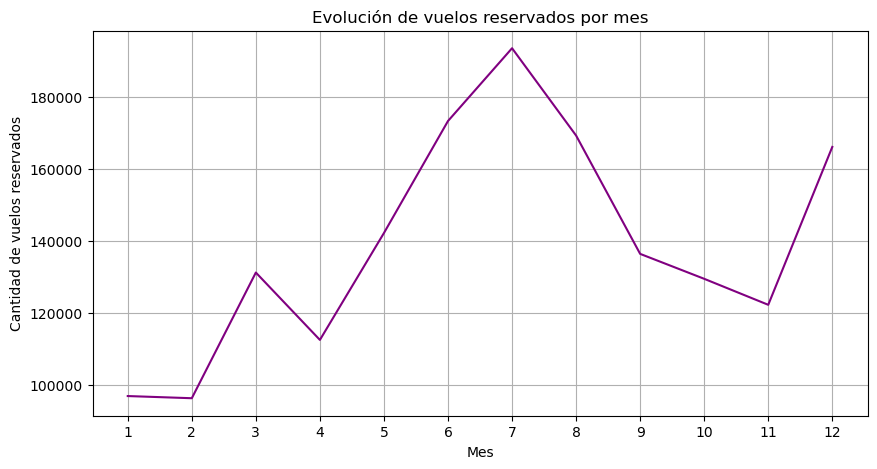

In [186]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=vuelos_mes.index, y=vuelos_mes.values, color= 'purple')  #Hago un gráfico de líneas para ver la evolución de los vuelos reservados por mes.
plt.xlabel("Mes")
plt.ylabel("Cantidad de vuelos reservados")
plt.title("Evolución de vuelos reservados por mes")
plt.xticks(range(1, 13)) #Rango de los meses hasta 13 porque sino el 12 no aparece
plt.grid(True)
plt.show()


In [187]:
#Podemos ver que hay un pico en el mes de julio y de nuevo otra subida durante el mes de diciembre (por vacaciones de verano y de navidades).

In [188]:
#2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

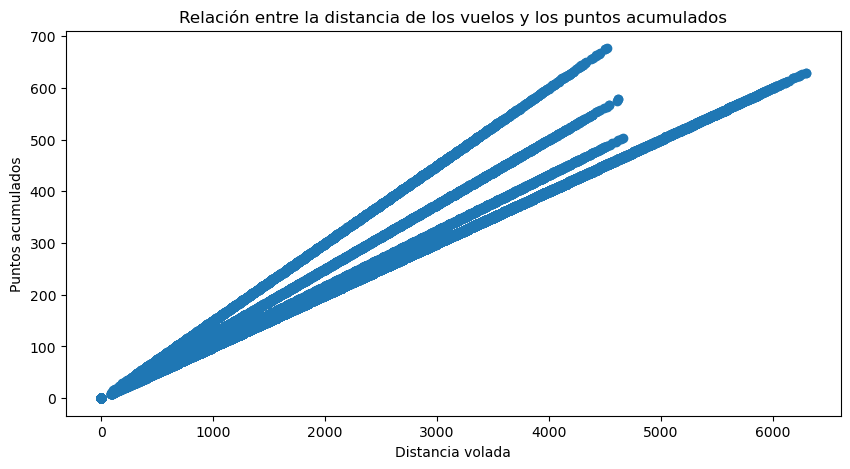

In [189]:
plt.figure(figsize=(10, 5))
plt.scatter(df_final["Distance"], df_final["Points Accumulated"]) #Me sirve tanto este como un sns.regplot, pero el otro tarda mucho en cargar.
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.show()


In [190]:
#Con este gráfico se ve que existe relación entre un valor y el otro. A mayor distancia volada, mayor número de puntos acumulados. Tiene sentido porque se acumumulan las millas recorridas.

In [191]:
#3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [192]:
#Cantidad de clientes por estado:
provincia = df_final["Province"].value_counts()

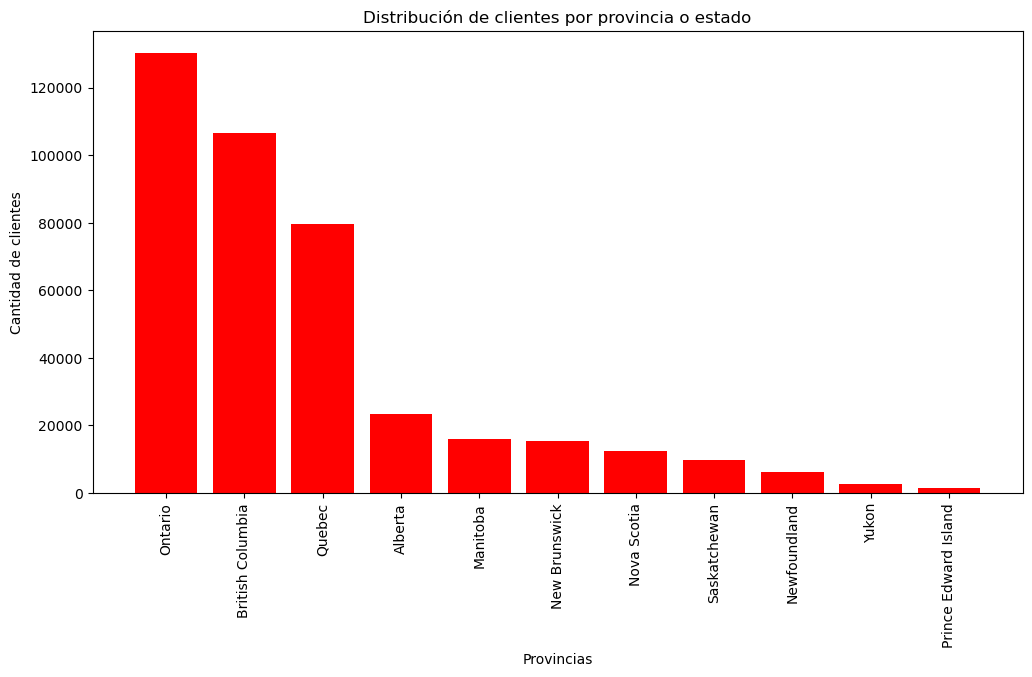

In [193]:
plt.figure(figsize=(12, 6))
plt.bar(provincia.index, provincia.values, color='red')
plt.xlabel("Provincias")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de clientes por provincia o estado")
plt.xticks(rotation=90)  #Giro las etiquetas para mejor visualización
plt.show()

In [194]:
#Solo aparecen 11 provincias porque se está quedando con las de Canadá. Podemos ver que las provincias con más clientes son Ontario, British Columbia y Quebec (las más pobladas de Canadá).

In [195]:
#4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

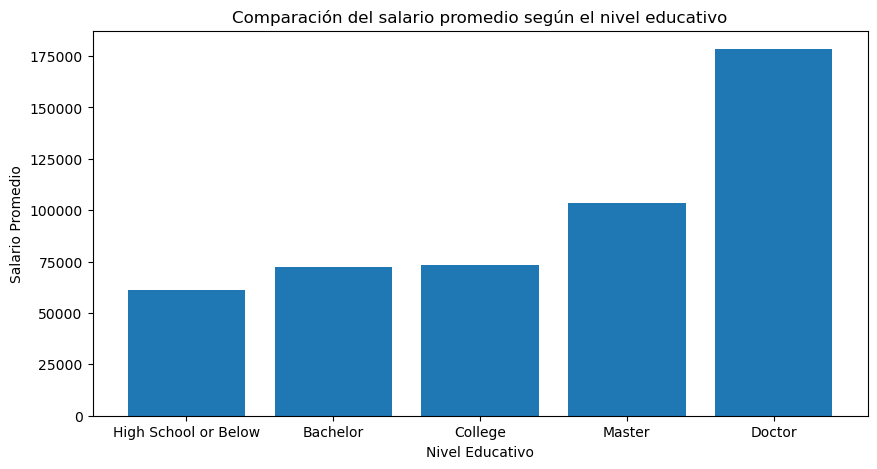

In [196]:
#Hacemos un groupby para poder calcular el salario promedio según el nivel educativo:
salario_promedio = df_final.groupby("Education")["Salary"].mean().sort_values()

#Hago una gráfica de barras relacionando variables categoricas con variables numéricas.
plt.figure(figsize=(10, 5))
plt.bar(salario_promedio.index, salario_promedio.values)
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario Promedio")
plt.title("Comparación del salario promedio según el nivel educativo")
plt.show()


In [197]:
#A mayor nivel educativo, mayor salario.

In [198]:
#5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

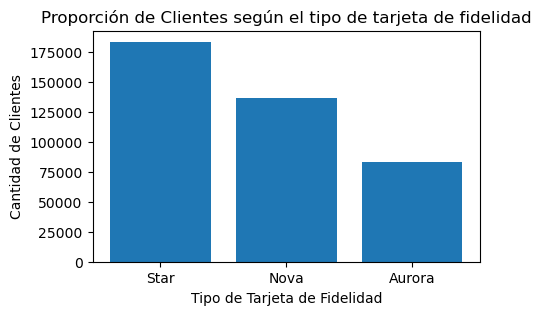

In [199]:
#Cantidad de clientes por tipo de tarjeta de fidelidad:
clientes_tarjeta = df_final["Loyalty Card"].value_counts()

#Como en el anterior, he elegido un gráfico de barras:
plt.figure(figsize=(5, 3))
plt.bar(clientes_tarjeta.index, clientes_tarjeta.values)
plt.xlabel("Tipo de Tarjeta de Fidelidad")
plt.ylabel("Cantidad de Clientes")
plt.title("Proporción de Clientes según el tipo de tarjeta de fidelidad")
plt.show()


In [200]:
#La tarjeta Star la tienen más del doble de clientes que la tarjeta Aurora. La tarjeta Aurora es la menos usada.

In [201]:
#6. ¿Cómo se distribuyen los clientes según su estado civil y género?

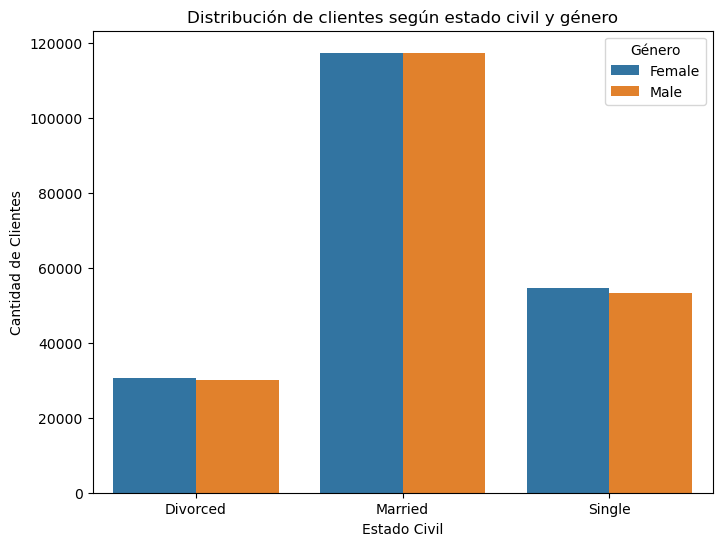

In [202]:
#Agrupar y convertir en numérico el género para poder hacer el gráfico de barras:
estado_civil_genero = df_final.groupby(["Marital Status", "Gender"]).size().reset_index(name="Count") #.reset_index(name="Count") convierte esto en un DataFrame con una columna numérica Count.

#Hago el gráfico de barras
plt.figure(figsize=(8, 6))  
sns.barplot(data=estado_civil_genero, x="Marital Status", y="Count", hue="Gender")
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de clientes según estado civil y género")
plt.legend(title="Género")
plt.show()


In [203]:
#Hay un mayor número de clientes casados, seguido de los solteros y por último los divorciados. En cuanto al génera, viajan más mujeres que hombres, pespecialmente las solteras o divorciadas (pero la diferencia es mínima).